# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Answering the questions in bold will enhance Python and Data Science skills sets!

## Data and Setup

____
** Import numpy and pandas **

In [166]:
import pandas as pd
import numpy as np


** Import visualization libraries and set %matplotlib inline. **

In [640]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set(style="darkgrid")

** Read in the csv file as a dataframe called df **

In [523]:
df = pd.read_csv('911.csv')

In [277]:
df.sample(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
84336,40.171075,-75.071167,COUNTY LINE RD & DAVISVILLE RD; UPPER MORELAN...,18974.0,EMS: RESPIRATORY EMERGENCY,2016-07-17 08:22:01,UPPER MORELAND,COUNTY LINE RD & DAVISVILLE RD,1
27891,40.280731,-75.642440,FARMINGTON AVE & N STATE ST; UPPER POTTSGROVE;...,19464.0,Traffic: VEHICLE ACCIDENT -,2016-02-17 19:31:06,UPPER POTTSGROVE,FARMINGTON AVE & N STATE ST,1
11905,40.038024,-75.280247,RIGHTERS MILL RD & FORD; LOWER MERION; Statio...,19035.0,EMS: HEAD INJURY,2016-01-11 13:32:01,LOWER MERION,RIGHTERS MILL RD & FORD,1
23531,40.114745,-75.285447,GERMANTOWN PIKE & LAUNFALL RD; PLYMOUTH; 2016-...,19462.0,Traffic: VEHICLE ACCIDENT -,2016-02-06 21:32:00,PLYMOUTH,GERMANTOWN PIKE & LAUNFALL RD,1
8473,40.150896,-75.127438,FITZWATERTOWN RD & BARTRAM RD; UPPER MORELAND...,19090.0,EMS: RESPIRATORY EMERGENCY,2016-01-02 18:07:00,UPPER MORELAND,FITZWATERTOWN RD & BARTRAM RD,1


** Check the info() of the df **

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [279]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [280]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [281]:
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [174]:
df["title"].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [524]:
 df["title"].sample(6) # This checks the sample of inputs in the title column

28944               Fire: FIRE ALARM
58596               EMS: HEAD INJURY
70011                  EMS: SEIZURES
46876              EMS: HEMORRHAGING
39224              EMS: HEMORRHAGING
81116    Traffic: VEHICLE ACCIDENT -
Name: title, dtype: object

In [525]:
df["newtitle"] =  df["title"].str.replace('[\-/ ]', '')
# This removes the - and / from the title, the data is cleaned so that they can all be uniform.
#It also creates a new column for newtitle
df["newtitle"].sample(9)

76976         EMS:UNCONSCIOUSSUBJECT
70773                 EMS:HEADINJURY
16013        Traffic:VEHICLEACCIDENT
48151           EMS:CARDIACEMERGENCY
27026        Traffic:VEHICLEACCIDENT
23224                   EMS:SEIZURES
48934        Traffic:VEHICLEACCIDENT
26292        Traffic:VEHICLEACCIDENT
29596    Fire:CARBONMONOXIDEDETECTOR
Name: newtitle, dtype: object

In [526]:
 # This splits the newtitle column into two new column 
ntitle = 'Reason adjustedTitle'.split()

In [527]:
 # This removes the : from the title and splits into two columns 
df[ntitle]=df.newtitle.str.extract(r'(\w+):(\w+)', expand = True ) 
df[ntitle].sample(5)

,Reason,adjustedTitle
24791,Fire,FIREALARM
24319,EMS,SYNCOPALEPISODE
89824,Traffic,VEHICLEACCIDENT
25277,EMS,SEIZURES
43637,EMS,VEHICLEACCIDENT


In [528]:
df = df.drop(["adjustedTitle", "newtitle"], axis=1) # This removes the unwanted column created adjustedtitle and newtitle
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [287]:
df[['title',"Reason"]].head()

,title,Reason
0,EMS: BACK PAINS/INJURY,EMS
1,EMS: DIABETIC EMERGENCY,EMS
2,Fire: GAS-ODOR/LEAK,Fire
3,EMS: CARDIAC EMERGENCY,EMS
4,EMS: DIZZINESS,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [288]:
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

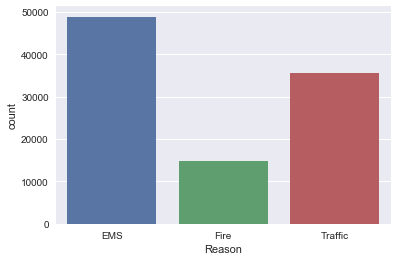

In [289]:
x =df["Reason"] 
sns.countplot(x)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [534]:
type("timeStamp")


str

In [535]:
df["timeStamp"].head()

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: timeStamp, dtype: object

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [536]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"], format= '%Y/%m/%d %H:%M:%S')
df["timeStamp"].head(10)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
5   2015-12-10 17:40:01
6   2015-12-10 17:40:01
7   2015-12-10 17:40:01
8   2015-12-10 17:40:01
9   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [293]:
time = df['timeStamp'].iloc[0]
print("hours = {}, date = {}, minutes = {}, seconds = {}".format(time.hour, time.day, time.minute, time.second))

hours = 17, date = 10, minutes = 40, seconds = 0


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [537]:
times = 'Hours Month DayOfWeek'.split()
times

['Hours', 'Month', 'DayOfWeek']

In [538]:
df['Hours'] = df["timeStamp"].apply(lambda x: x.hour)
df['Month'] = df["timeStamp"].apply(lambda y: y.month)
df['DayOfWeek'] = df["timeStamp"].apply(lambda z: z.dayofweek)
df[times].head(5)

,Hours,Month,DayOfWeek
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [539]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["DayOfWeek"] = df["DayOfWeek"].map(dmap)
df["DayOfWeek"].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: DayOfWeek, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

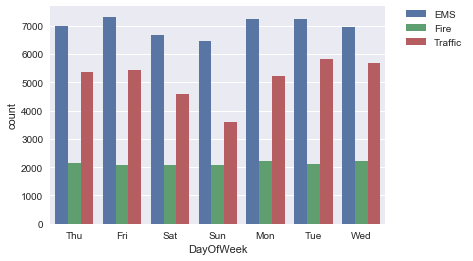

In [298]:
sns.countplot(df["DayOfWeek"], hue=df["Reason"])
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

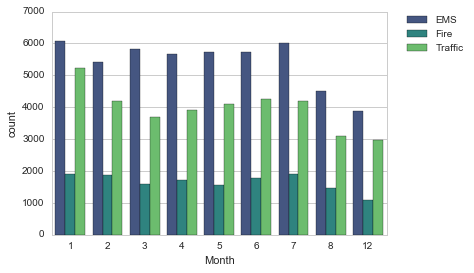

In [3]:
##Question

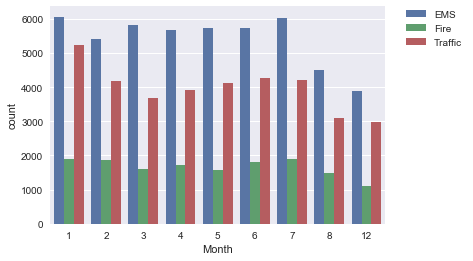

In [299]:
#Solution
sns.countplot(df["Month"], hue=df["Reason"])
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [169]:
#Question

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [300]:
#Solution
dfMonth = df.groupby("Month").count()
dfMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [301]:
dfmonth = dfMonth.reset_index()
dfmonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,DayOfWeek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

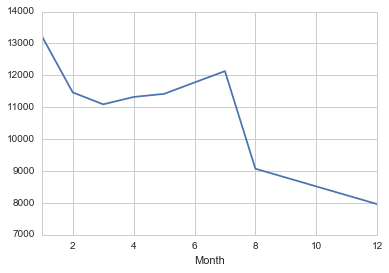

In [175]:
#Question

(1, 12)

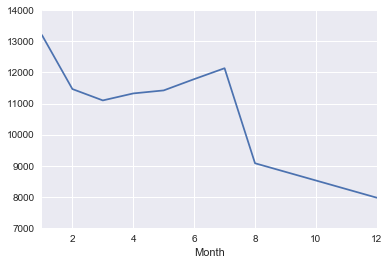

In [391]:
plt.plot(dfmonth["Month"], dfmonth["lat"])
plt.xlabel("Month")
plt.ylim([7000, 14000])
plt.xlim([1, 12])

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

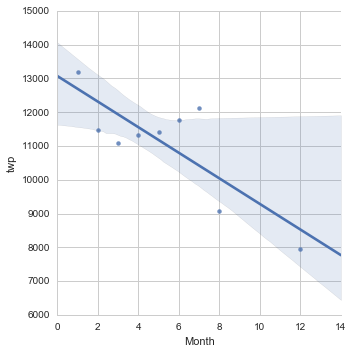

In [187]:
#Question

(6000, 15000)

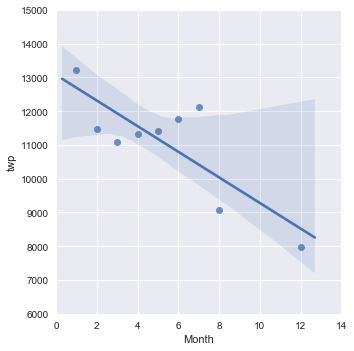

In [405]:
sns.lmplot(x = "Month", y= "twp", data = dfmonth)
plt.xlim([0, 14])
plt.ylim([6000, 15000])

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [540]:
#df["Date"] = df.timeStamp.dt.to_period('M')
df["Date"] = df['timeStamp'].apply(lambda x:x.date())
df[['timeStamp','Date']].head()

,timeStamp,Date
0,2015-12-10 17:40:00,2015-12-10
1,2015-12-10 17:40:00,2015-12-10
2,2015-12-10 17:40:00,2015-12-10
3,2015-12-10 17:40:01,2015-12-10
4,2015-12-10 17:40:01,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

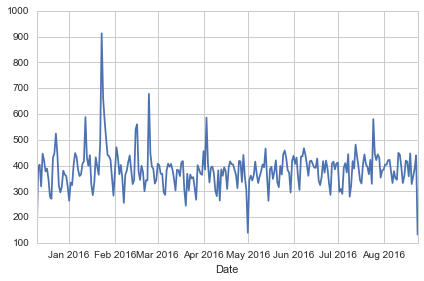

In [197]:
# Question

In [449]:
#not needed
#df["Date"] =pd.to_datetime(df["Date"])
#df["DateM"] =  df.Date.dt.to_period('M')    # or df["DateM"] =  df['Date'].apply(lambda x: x.strftime('%b %Y'))
#df["DateM"].head()


0   2015-12
1   2015-12
2   2015-12
3   2015-12
4   2015-12
Name: DateM, dtype: object

In [541]:
#solution
dfDate = df.groupby("Date").count()

In [ ]:
## dmap = {2015-12:'Dec 2015','2016-01':'Jan 2016',"2016-02":'Feb 2016', '2016-03':'Mar 2016', 
#''2016-04':'Apr 2016','2016-05':'May 2016','2016-06':'Jun 2016', '2016-07': 'Jul 2016',
#'2016-08': 'Aug 2016', '2016-09': 'Sep 2016'}
#dfD["DateM"] = dfD["DateM"].map(dmap)

In [542]:
dfD = dfDate.reset_index()

Text(0.5,0,'Date')

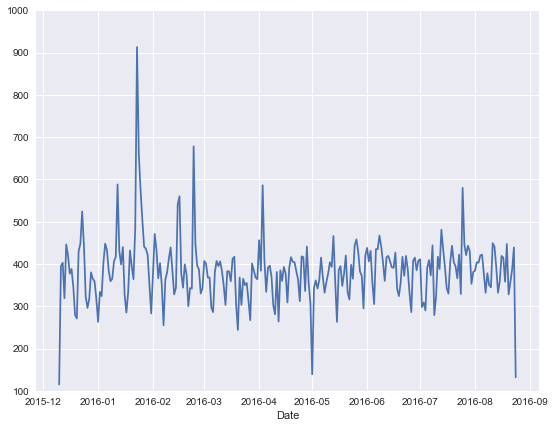

In [543]:
plt.figure(figsize=(9,7))
p =dfD["Date"]
q= dfD["twp"]
plt.plot(p,q)
plt.ylim([100, 1000])
plt.xlabel("Date")

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

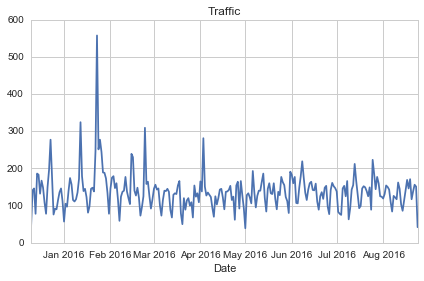

In [199]:
# Question 

In [495]:
#Solution
dfDateR =df[["Date","Reason"]]
u = dfDateR[dfDateR["Reason"] == "Traffic"]
dfT =u.groupby("Date").count()
dfT.head()

,Reason
Date,
2015-12-10,43
2015-12-11,141
2015-12-12,146
2015-12-13,78
2015-12-14,186


In [496]:
#Resseting index
dfT = dfT.reset_index()
dfT.head()

,Date,Reason
0,2015-12-10,43
1,2015-12-11,141
2,2015-12-12,146
3,2015-12-13,78
4,2015-12-14,186


Text(0.5,1,'Traffic')

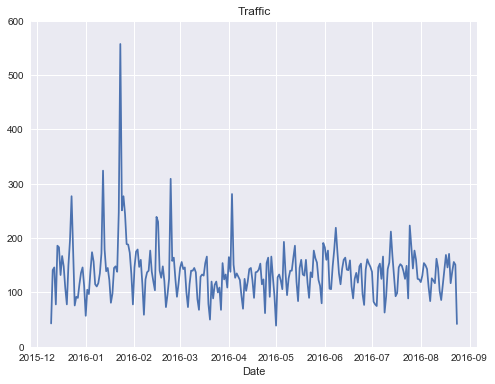

In [502]:
plt.figure(figsize=(8,6))
w =dfT["Date"]
x= dfT["Reason"]
plt.plot(w,x)
plt.ylim([0, 600])
plt.xlabel('Date')
plt.title("Traffic")

#### Plot for Date against Reason-Fire

In [503]:
# Plot for Fire
#Solution
v = dfDateR[dfDateR["Reason"] == "Fire"]
dfF =v.groupby("Date").count()
dfF.head()

,Reason
Date,
2015-12-10,15
2015-12-11,69
2015-12-12,68
2015-12-13,51
2015-12-14,39


Text(0.5,1,'Fire')

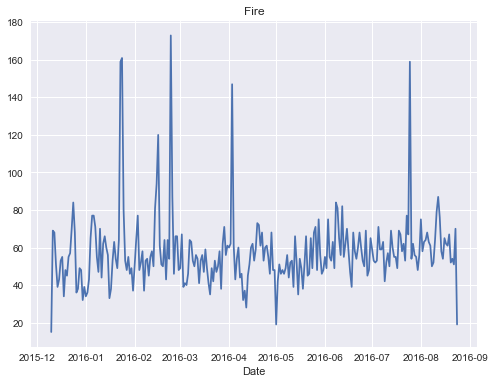

In [505]:
# Resetting Index and plotting graph
dfF = dfF.reset_index()
plt.figure(figsize=(8,6))
w =dfF["Date"]
x= dfF["Reason"]
plt.plot(w,x)
plt.xlabel('Date')
plt.title("Fire")


#### Plotting Date against Reason -EMS

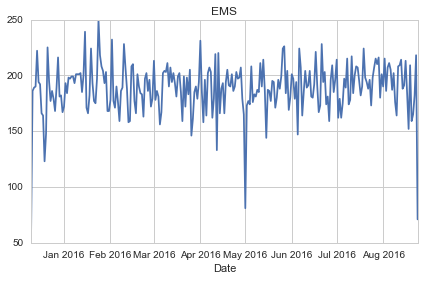

In [202]:
# Question

In [520]:
# Plot for EMS
#Solution
w = dfDateR[dfDateR["Reason"] == "EMS"]
dfE =w.groupby("Date").count()
dfE.head()

,Reason
Date,
2015-12-10,57
2015-12-11,186
2015-12-12,189
2015-12-13,190
2015-12-14,222


(50, 250)

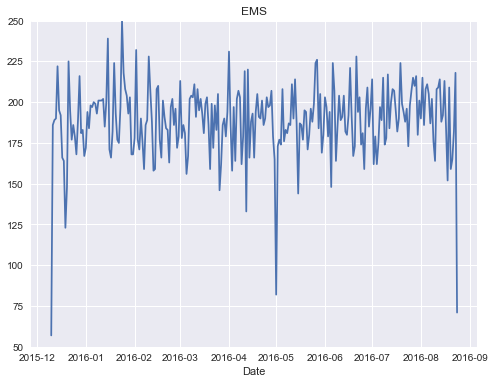

In [521]:
# Resetting Index and plotting graph
dfE = dfE.reset_index()
plt.figure(figsize=(8,6))
y =dfE["Date"]
z= dfE["Reason"]
plt.plot(y,z)
plt.xlabel('Date')
plt.title("EMS")
plt.ylim([50,250])

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [203]:
# Question

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [626]:
#df.reset_index(["DayOfWeek","Hours"], inplace = True)

In [654]:
df.head()

,DayOfWeek,Hours,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Date
0,Thu,17,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,2015-12-10
1,Thu,17,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,2015-12-10
2,Thu,17,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,2015-12-10
3,Thu,17,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,2015-12-10
4,Thu,17,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,2015-12-10


In [655]:
dfstack = df.groupby(["DayOfWeek", "Hours"]).count()
dfstack.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
DayOfWeek Hours                                                          
Fri       0      275  275   275  248    275        275  275   275  275   
          1      235  235   235  200    235        235  235   232  235   
          2      191  191   191  165    191        191  191   191  191   
          3      175  175   175  164    175        175  175   175  175   
          4      201  201   201  184    201        201  201   201  201   

                 Reason  Month  Date  
DayOfWeek Hours                       
Fri       0         275    275   275  
          1         235    235   235  
          2         191    191   191  
          3         175    175   175  
          4         201    201   201

In [674]:
#Solution
dfSt = dfstack.unstack(level= 1)
dfSt["lat"].head()

Hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

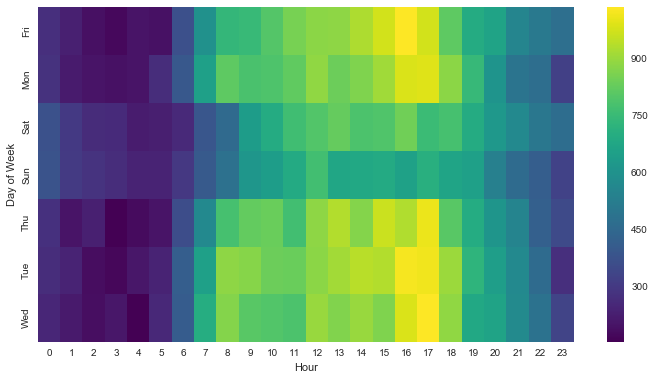

In [204]:
#Question

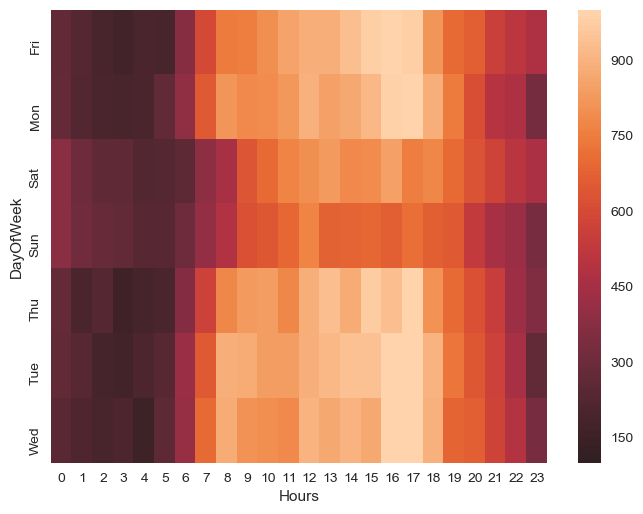

In [675]:
plt.figure(figsize=(8,6), dpi= 100)
sns.heatmap(dfSt["lat"], center = 0,vmin=100, vmax=1000)

** Now create a clustermap using this DataFrame. **

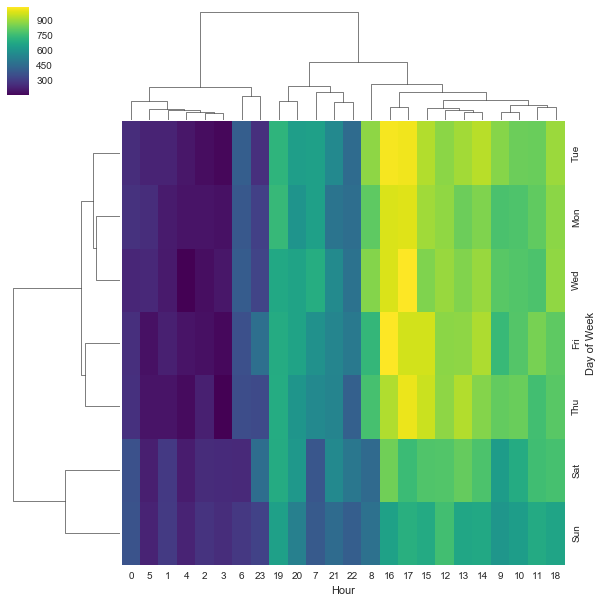

In [205]:
# Question

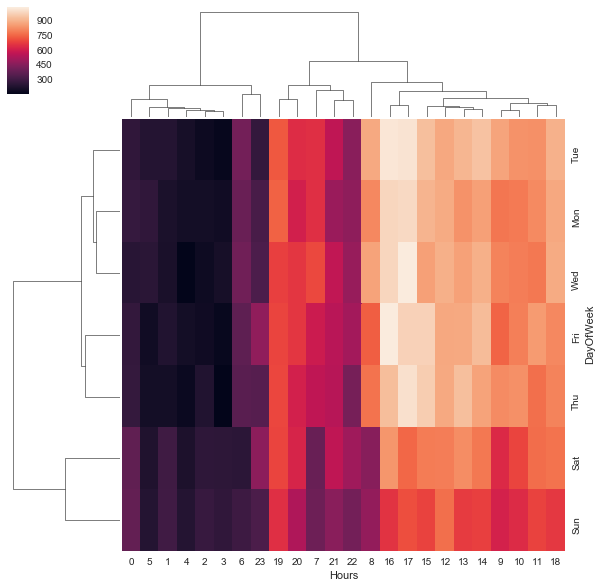

In [676]:
sns.clustermap(dfSt["lat"])

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [207]:
#Question

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [665]:
# For Month
dfDayMonth = df.groupby(["DayOfWeek", "Month"]).count()
dfDayMonth.head()

Hours   lat   lng  desc   zip  title  timeStamp   twp  addr  \
DayOfWeek Month                                                                
Fri       1       1970  1970  1970  1970  1736   1970       1970  1970  1955   
          2       1581  1581  1581  1581  1362   1581       1581  1581  1566   
          3       1525  1525  1525  1525  1332   1525       1525  1523  1519   
          4       1958  1958  1958  1958  1684   1958       1958  1958  1948   
          5       1730  1730  1730  1730  1504   1730       1730  1730  1720   

                    e  Reason  Date  
DayOfWeek Month                      
Fri       1      1970    1970  1970  
          2      1581    1581  1581  
          3      1525    1525  1525  
          4      1958    1958  1958  
          5      1730    1730  1730

In [686]:
#Solution
dfM = dfDayMonth.unstack(level= 1)
dfM = dfM["Hours"] # This selects the first column -Hours and the first 5 rows
dfM

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


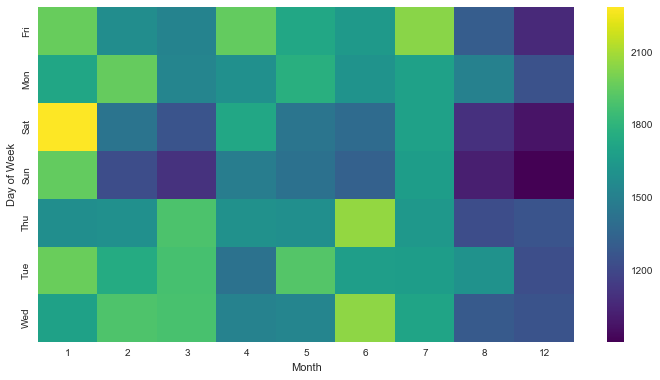

In [208]:
#Question

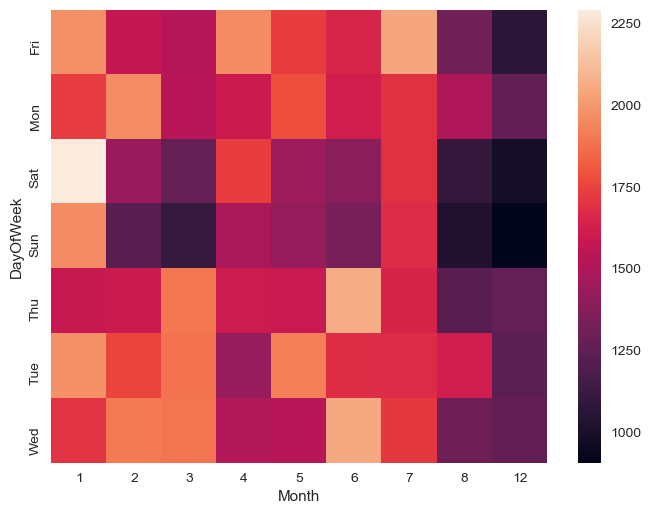

In [687]:
# Solution
plt.figure(figsize=(8,6), dpi= 100)
sns.heatmap(dfM)

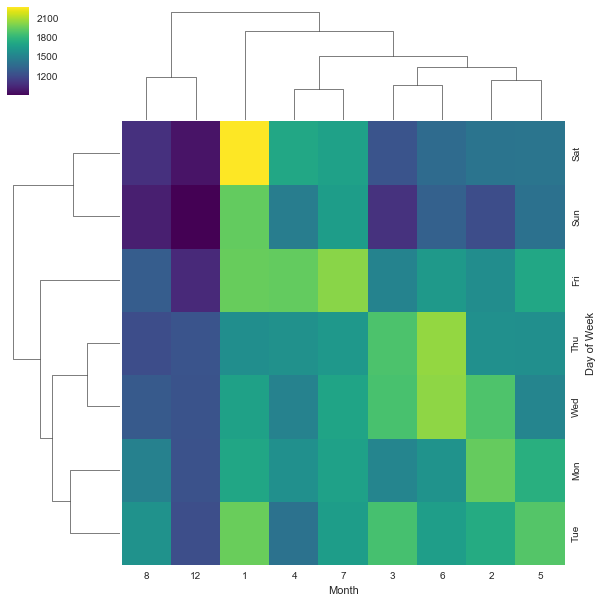

In [209]:
# Question

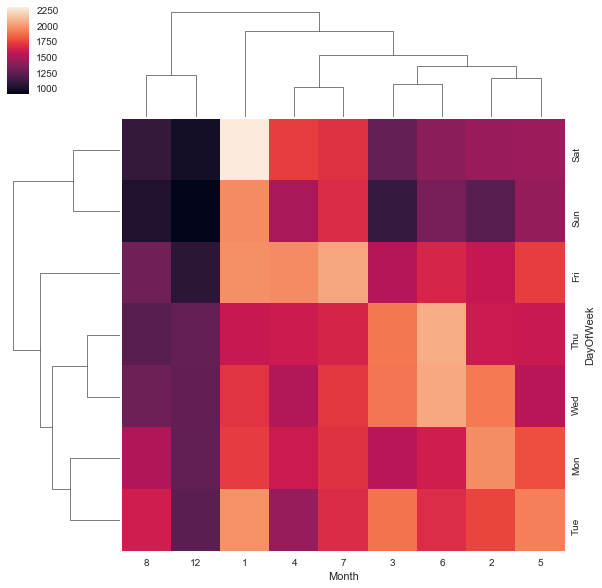

In [689]:
# Solution
sns.clustermap(dfM)

**Continue exploring the Data however you see fit!**
# Great Job!